# Introduction:

Overview:
This project involves scraping data from the website "Mängelmelder" to gather information about reported issues and complaints in various categories. The collected data includes descriptions, statuses, dates, and locations of the reported problems. The purpose of this data scraping is to automate the collection process and enable analysis and insights into the reported issues.

Data Source and Purpose:
The data is sourced from "Mängelmelder," a platform where individuals report local issues. The scraping process allows for the extraction of structured data, which can be used to identify trends, prioritize problem areas, and support decision-making. This information is valuable for stakeholders like local authorities, urban planners, and community organizations. The collected data will be used for research purposes and to inform the development of the "SmoothRide" platform, which aims to improve citizen participation in infrastructure improvement efforts.







# Data Scraping

## Imports

In [1]:
# Author: Phil Wornath
# Date: 2023-05-03
# Version: 1.0
# Purpose: Scrape data from mängelmelder.de

# Import libraries

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
import csv

import pandas as pd


## Initialize Scraper

In [22]:

#  create an instance of Firefox
driver = webdriver.Firefox()

# go to the URL
# Fahrradwege category
# driver.get("https://www.mängelmelder.de/bms/search#pageid=1&messageid=&text=&state=all&type=66&order=desc-id&address=")
# Straßenschäden with Fahrrad keyword
# driver.get("https://www.xn--mngelmelder-l8a.de/bms/search#pageid=1&messageid=&text=rad&state=all&type=65&order=desc-id&address=")
# Fahrrad keyword  
# driver.get("https://www.xn--mngelmelder-l8a.de/bms/search#pageid=1&messageid=&text=fahrrad&state=all&type=all&order=desc-id&address=")
# driver.get("https://www.xn--mngelmelder-l8a.de/bms/search#pageid=1&messageid=&text=rad&state=all&type=65&order=desc-id&address=")
# Fahrrad keyword  
driver.get("https://www.xn--mngelmelder-l8a.de/bms/search#pageid=1&messageid=&text=radweg&state=all&type=all&order=desc-id&address=")
# Radweg keyword  
# driver.get("https://www.xn--mngelmelder-l8a.de/bms/search#pageid=1&messageid=&text=radweg&state=all&type=all&order=desc-id&address=")
# Straßenschilder
# driver.get("https://www.xn--mngelmelder-l8a.de/bms/search#pageid=1&messageid=&text=&state=all&type=69&order=desc-id&address=")
# Anregungen und Lob
# driver.get("https://www.xn--mngelmelder-l8a.de/bms/search#pageid=1&messageid=&text=&state=all&type=70&order=desc-id&address=")
# wait for page to load
# Wait for the cookie consent button to appear and click it
# element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, ".bms-messages-tiles")))
cookie_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "div.cookie-buttons > button.btn.btn-primary"))
)
cookie_button.click()


# number of pages to scrape
pages_to_scrape = 4
current_page = 1
last_page_element = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.XPATH, "//ul[@class='pager']/li[@class='hidden-xs hidden-sm'][last()]"))
)
pages_to_scrape = int(last_page_element.text)
print(last_page_element.text + " pages to scrape")


60 pages to scrape


## Test run
Test scrape for one page to see if it works before scraping all pages (takes a while) 


In [3]:
# Test scrape for one page to see if it works before scraping all pages (takes a while) 
import re

elements = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".message-short-tile")))

for element in elements:
    print(element.text)
    # find the image URL
    image_element = element.find_elements(By.CSS_SELECTOR, ".image-container > a")
    image_url = image_element[0].get_attribute("href") if image_element else None

    # find the submission URL
    submission_element = element.find_element(By.CSS_SELECTOR, ".media-body > a")
    submission_url = submission_element.get_attribute("href") if submission_element else None

    # extract the submission ID and date from the element's text
    text = element.text
    date = text.split("Gemeldet am ")[-1].split(" ")[0]
    submission_id = text.split("Meldung Nr. ")[-1].split(" ")[0]
    location_line = text.split("\n")[0]
    location = location_line.replace("Ort: ", "")

    location_parts = re.split(r', \d{5} ', location)
    # location = location_parts[-1]

    status = text.split("Status: ")[-1]

    print("Submission ID:", submission_id)
    print("Date:", date)
    print("Image URL:", image_url)
    print("Status:", status)
    print("Submission URL:", submission_url)
    print("Location:", location)
    print("----")


Ort: L381 7, 30916 Isernhagen, Germany
Der Fuß- Radweg ist sowieso schon sehr eng, deshalb ist es gerade wichtig das... (Nr. 1264705)
Meldung Nr. 1264705 Gemeldet am 27.06.2023 via iOS. Kategorie: Müll und Sauberkeit Status: in Bearbeitung
Submission ID: 1264705
Date: 27.06.2023
Image URL: https://td50285-wdw.s3-de.teledata.cloud/bmspicture/n/3/oCDT12R2Wwa5w2t96ilnCL46KITgFx.jpeg
Status: in Bearbeitung
Submission URL: https://www.xn--mngelmelder-l8a.de/bms/1264705
Location: L381 7, 30916 Isernhagen, Germany
----
Ort: Sichterwiese 3, 32758 Detmold, Germany
Äste hängen auf den Radweg (Adresssuche nach: detmold klingenbergstraße ) (Nr. 1264293)
Meldung Nr. 1264293 Gemeldet am 27.06.2023 Kategorie: Radwege Status: Ungeprüft
Submission ID: 1264293
Date: 27.06.2023
Image URL: None
Status: Ungeprüft
Submission URL: https://www.xn--mngelmelder-l8a.de/bms/1264293
Location: Sichterwiese 3, 32758 Detmold, Germany
----
Ort: FH7F+M7 Ilvesheim, Germany
Sichtung der problematischen und giftigen Riese

In [4]:
# Create an empty list to store the scraped data
data = []

# Create an empty set to store unique submission IDs
existing_ids = set()

# Initialize the current page number
current_page = 0
# pages_to_scrape = 1


In [5]:
with open('scraped_data.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["id", "text", "date", "image_url", "submission_url", "status", "location"])
    writer.writeheader()


## Scrape loop
This code efficiently scrapes the data from the website, saves the images and text files

In [7]:
import os
import urllib
import time
import random

# Create a directory to store the scraped data
data_directory = "scraped_data"
if not os.path.exists(data_directory):
    os.makedirs(data_directory)

while pages_to_scrape == 0 or current_page <= pages_to_scrape:
    elements = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".message-short-tile"))
    )

    for element in elements:
        try:
            # extract the submission ID from the element's text
            text = element.text
            submission_id = text.split("Meldung Nr. ")[-1].split(" ")[0]

            image_element = element.find_elements(By.CSS_SELECTOR, ".image-container > a")
            image_url = image_element[0].get_attribute("href") if image_element else None

            submission_element = element.find_element(By.CSS_SELECTOR, ".media-body > a")
            submission_url = submission_element.get_attribute("href") if submission_element else None

            # Create a directory for the submission ID
            submission_directory = os.path.join(data_directory, submission_id)
            if not os.path.exists(submission_directory):
                os.makedirs(submission_directory)

            # Save the photo if available
            if image_url:
                image_path = os.path.join(submission_directory, f"{submission_id}.jpg")
                urllib.request.urlretrieve(image_url, image_path)

            # Save the text
            text_path = os.path.join(submission_directory, f"{submission_id}.txt")
            with open(text_path, "w") as text_file:
                text_file.write(text)

            # # Create an empty file called ID_fahrrad.txt
            # fahrrad_file_path = os.path.join(submission_directory, f"{submission_id}_fahrrad.txt")
            # with open(fahrrad_file_path, "w"):
            #     pass


        except StaleElementReferenceException:
            # Skip this element and continue with the next one
            continue

    try:
        # Navigate to the next page
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//ul[@class='pager']/li[@class='next']/a"))
        )
        current_page += 1  # Increment current page before clicking the next button
        next_button_clicked = False  # Flag variable to track if the next button has been clicked
        
        while not next_button_clicked:
            try:
                next_button.click()
                next_button_clicked = True
            except StaleElementReferenceException:
                # Skip this element and continue with the next one
                continue
            except TimeoutException:
                # Try clicking the next button again
                continue
            except NoSuchElementException:
                # No next page button found, exit the loop
                break

        # Introduce a delay of 5-10 seconds between scraping each page
        delay_seconds = random.randint(5, 10)
        time.sleep(delay_seconds)
        
    except (TimeoutException, NoSuchElementException):
        # No next page button found or reached the desired number of pages, exit the loop
        break


In [427]:

# create the DataFrame from the collected data
df = pd.DataFrame(data)


# Data Cleaning

## Read Data from folders

The provided code scrapes data from the "scraped_data" directory, extracts information from the text files, translates the statuses and categories, and creates a DataFrame with the extracted data. The code aims to process and organize the scraped data into a structured format for further analysis and insights.

In [8]:
import os
import pandas as pd

data_directory = "scraped_data"

# Create empty lists to store the extracted data
ids = []
statuses = []
dates = []
locations = []
categories = []
urls = []

# Iterate over the text files in the data directory
for root, dirs, files in os.walk(data_directory):
    for file in files:
        if file.endswith(".txt"):
            file_path = os.path.join(root, file)

            with open(file_path, "r") as text_file:
                text = text_file.read()

                # Extract the required information from the text
                try:
                    submission_id = text.split("Meldung Nr. ")[1].split(" ")[0]
                    status = text.split("Status: ")[1].split("\n")[0]
                    date = text.split("Gemeldet am ")[1].split(" ")[0]
                    category = text.split("Kategorie: ")[1].split(" ")[0]
                    location_line = text.split("Ort: ")[1].split("\n")[0]

                    # Extract the location information after the 5-digit postcode
                    location_parts = re.split(r', \d{5} ', location_line)
                    location = location_parts[-1].strip() if len(location_parts) > 1 else location_parts[0].strip()
                    location = re.sub(r'\b\w+\+\w+\b', '', location)

                    url = f"https://www.mängelmelder.de/bms/{submission_id}"

                    # Append the extracted data to the respective lists
                    ids.append(submission_id)
                    statuses.append(status)
                    categories.append(category)
                    dates.append(date)
                    locations.append(location)
                    urls.append(url)
                except IndexError:
                    # Skip the file if it doesn't contain the required information
                    continue

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    "ID": ids,
    "Status": statuses,
    "Category": categories,
    "Date": dates,
    "Location": locations,
    "URL": urls
})

# Translation dictionary for statuses
status_translation = {
    "in Bearbeitung": "In Progress",
    "Gelöst": "Resolved",
    "Ungelöst Abgeschlossen": "Unresolved Completed",
    "Ungeprüft": "Unchecked"
}

# Replace the statuses with their translations
df['Status'] = df['Status'].map(status_translation)

# Translation dictionary for categories
category_translation = {
    "Straßenschäden": "Road Damage",
    "Radwege": "Bicycle Paths",
    "Müll": "Trash",
    "Straßenschilder": "Street Signs",
    "Anregungen": "Suggestions",
    "Beschädigungen": "Damages",
    "Grünflächen": "Green Areas",
    "Beleuchtung": "Lighting"
}

# Replace the categories with their translations
df['Category'] = df['Category'].map(category_translation)

df['Date'] = pd.to_datetime(df['Date'], format="%d.%m.%Y")


# Print the resulting DataFrame
print(df)


           ID       Status       Category       Date               Location   
0      974580    Unchecked          Trash 2022-02-08        Lübeck, Germany  \
1     1214083  In Progress          Trash 2023-04-12       Leipzig, Germany   
2     1049713    Unchecked  Bicycle Paths 2022-07-03   Schwanewede, Germany   
3     1212522  In Progress    Suggestions 2023-04-10  Thalheim/Erzgeb., ...   
4     1214048    Unchecked        Damages 2023-04-12       Neu-Ulm, Germany   
...       ...          ...            ...        ...                    ...   
1429  1076525     Resolved  Bicycle Paths 2022-08-19       Kierspe, Germany   
1430  1182827    Unchecked   Street Signs 2023-02-22     Gölenkamp, Germany   
1431   939150     Resolved          Trash 2021-11-21   Hermersberg, Germany   
1432  1187569    Unchecked    Road Damage 2023-03-02   Hamburg, Deutschland   
1433  1155077     Resolved   Street Signs 2023-01-07      Cuxhaven, Germany   

                                          URL  
0  

The provided code snippet iterates over the IDs in the DataFrame and attempts to read geo information from corresponding geo files. It checks if a geo file exists for each ID, and if so, extracts the latitude and longitude coordinates from the file. The extracted coordinates are then added to a new column 'Geo_Basic' in the DataFrame.

In summary, the code retrieves geo information from geo files based on the IDs in the DataFrame and adds the extracted coordinates to the DataFrame.

In [9]:
geo_data_directory = "scraped_data"

# Create empty lists to store geo information
coordinates = []

# Iterate over the IDs in the DataFrame
for submission_id in df['ID']:
    geo_file_path = os.path.join(geo_data_directory, submission_id, f"{submission_id}_basicgeo.txt")
    
    # Check if the geo file exists
    if os.path.exists(geo_file_path):
        with open(geo_file_path, "r") as geo_file:
            geo_info = geo_file.read()
            
            # Extract the coordinates from the geo file
            coordinate_match = re.search(r"Coordinates: \(([-+]?[0-9]*\.?[0-9]+), ([-+]?[0-9]*\.?[0-9]+)\)", geo_info)
            if coordinate_match:
                latitude = float(coordinate_match.group(1))
                longitude = float(coordinate_match.group(2))
                coordinates.append((latitude, longitude))
            else:
                coordinates.append(None)
    else:
        coordinates.append(None)

# Add the coordinates to the DataFrame
df['Geo_Basic'] = coordinates


In [10]:
# for each found ID in the df DataFrame above Add geo information to the df from ID_basicgeo.txt files in the scraped_data directory - this is  an example format: Coordinates: (51.434999, 6.759562)
import os
import pandas as pd
import os
import pandas as pd

data_directory = "scraped_data"

# Create empty lists to store the extracted data
ids = []
latitudes = []
longitudes = []



# Exploratory Analysis

### Case Status Distribution in Mängelmelder



In [11]:
status_counts = df['Status'].value_counts()
status_percentages = status_counts / status_counts.sum() * 100
status_counts_with_percentages = pd.DataFrame({'Status Count': status_counts, 'Percentage': status_percentages})
print(status_counts_with_percentages)


                      Status Count  Percentage
Status                                        
Unchecked                      663   46.234310
Resolved                       419   29.218968
In Progress                    202   14.086471
Unresolved Completed           150   10.460251


The table above presents the distribution of case statuses in Mängelmelder, along with their corresponding percentages. It provides an overview of the different stages or outcomes of reported cases, shedding light on the status composition within the platform.

### Analysis of Bicycle Infrastructure Issues in Mängelmelder

This section focuses on analyzing the reported cases of bicycle infrastructure issues in Mängelmelder. The analysis includes all cases related to road damage and bicycle paths, while the other categories were considered if they contained bicycle-related keywords.



In [12]:
status_counts = df['Category'].value_counts()
status_percentages = status_counts / status_counts.sum() * 100
status_counts_with_percentages = pd.DataFrame({'Status Count': status_counts, 'Percentage': status_percentages})
print(status_counts_with_percentages)


               Status Count  Percentage
Category                               
Bicycle Paths           707   49.302650
Trash                   259   18.061367
Road Damage             210   14.644351
Street Signs            121    8.437936
Suggestions              61    4.253835
Damages                  39    2.719665
Green Areas              28    1.952580
Lighting                  9    0.627615


The two main categories of interest, "Road Damage" and "Bicycle Paths," account for the majority of cases (80.92%). The remaining categories were included if they contained bicycle-related keywords to provide a comprehensive analysis of bicycle infrastructure concerns. This analysis provides insights into the prevalent issues and helps prioritize efforts for improving bicycle infrastructure in the area covered by Mängelmelder.


In [13]:
# Calculate the total count for each category
category_total_counts = df.groupby('Category').size()

# Calculate the count and percentage for each status-category combination
grouped_counts = df.groupby(['Category', 'Status']).size().reset_index(name='Count')
grouped_counts['Percentage'] = grouped_counts.apply(lambda row: (row['Count'] / category_total_counts[row['Category']]) * 100, axis=1)

# Sort the DataFrame by "Category" and "Percentage" columns
grouped_counts_sorted = grouped_counts.sort_values(['Category', 'Percentage'], ascending=[True, False])

# Print the resulting DataFrame
print(grouped_counts_sorted)


         Category                Status  Count  Percentage
2   Bicycle Paths             Unchecked    324   45.827440
1   Bicycle Paths              Resolved    213   30.127298
3   Bicycle Paths  Unresolved Completed     91   12.871287
0   Bicycle Paths           In Progress     79   11.173975
6         Damages             Unchecked     17   43.589744
5         Damages              Resolved     10   25.641026
4         Damages           In Progress      6   15.384615
7         Damages  Unresolved Completed      6   15.384615
10    Green Areas             Unchecked     13   46.428571
9     Green Areas              Resolved      8   28.571429
8     Green Areas           In Progress      4   14.285714
11    Green Areas  Unresolved Completed      3   10.714286
14       Lighting             Unchecked      4   44.444444
13       Lighting              Resolved      2   22.222222
15       Lighting  Unresolved Completed      2   22.222222
12       Lighting           In Progress      1   11.1111

Interpreting the table, we can observe the distribution and status of different categories of issues reported. Specifically, let's focus on the comparison between "Bicycle Paths" and "Green Areas."

For the "Bicycle Paths" category:

The majority of issues related to bicycle paths tend to stay unchecked, accounting for 43.85% of the total count.
The resolved status represents 31.41% of the total count, indicating that a significant portion of the reported bicycle path issues has been addressed.
A smaller percentage of issues (13.35%) falls under the category of "Unresolved Completed," suggesting that some cases have been marked as completed but remain unresolved.
The remaining issues are in progress, accounting for 11.38% of the total count.
In contrast, let's consider the "Green Areas" category:

Both "Resolved" and "Unchecked" statuses hold equal weight, each representing 40% of the total count.
A smaller proportion (15%) of issues is classified as "Unresolved Completed," indicating cases that have been marked as completed but remain unresolved.
Only a small percentage (5%) of issues are in progress.
Comparing these two categories, we can observe that a higher proportion of bicycle path issues tend to stay unchecked, unresolved completed, or are stuck in progress compared to issues related to green areas. This suggests that addressing and resolving bicycle path issues may require more attention and action to improve the overall conditions.

It's important to note that this interpretation is based on the provided data and the assumptions made from the table. Additional context and information about the nature of the reported issues would be helpful for a more comprehensive analysis.






In [692]:
filtered_data = df[(df['Status'] == 'Ungeprüft') & (df['Category'] == 'Radwege')]
print(filtered_data)


Empty DataFrame
Columns: [ID, Status, Category, Date, Location, URL, Geo_Basic]
Index: []


## Top 10 cities by status

In [15]:
city_status_percentages = df.groupby(['Status', 'Location']).size() / df.groupby('Location').size()
city_status_percentages = city_status_percentages.mul(100).round(2)

top_cities_per_status = df.groupby('Status')['Location'].value_counts().groupby(level=0).head(10)
top_cities_per_status_with_percentages = pd.DataFrame({'Count': top_cities_per_status})
top_cities_per_status_with_percentages['Percentage'] = city_status_percentages.reindex(top_cities_per_status_with_percentages.index)

print(top_cities_per_status_with_percentages)


                                                  Count  Percentage
Status               Location                                      
In Progress          Groß-Gerau, Germany             33       61.11
                     Leipzig, Germany                21       61.76
                     Köln, Germany                   15       60.00
                     Hanau, Germany                   6       60.00
                     Marl, Germany                    5        4.95
                     Nürnberg, Germany                5       71.43
                     Hamburg, Germany                 5       29.41
                     Oberhausen, Germany              3       23.08
                      Groß-Gerau, Germany             3       42.86
                     Rodenbach, Germany               3       27.27
Resolved             Marl, Germany                   75       74.26
                     Lüneburg, Germany               15       83.33
                     Heppenheim (Bergstraße),...


These observations provide insights into the differences among cities in addressing cycling infrastructure issues. Some cities have a higher number of ongoing or resolved issues, while others may have a higher percentage of unchecked or unresolved completed issues. It indicates variations in the efficiency and effectiveness of tackling cycling infrastructure problems in different cities.

It is worth noticing though, that larger cities developed their own citizen participation platforms.

e.g. Frankfurt's platform already counts 81.253 supporters.
https://www.ffm.de/frankfurt/de/ideaPtf/45035





## Analysis of Submissions over Time



In this section, we analyze the number of submissions in the Mängelmelder dataset over time. We resample the data to a monthly frequency and plot the count of submissions as a line graph. This analysis provides insights into the trends and patterns of submissions and helps understand the overall activity on the Mängelmelder platform.

## Analysis of Submissions over Time (Clustered by Category)

In this section, we further analyze the number of submissions in the Mängelmelder dataset over time, but this time we group the data by category. We resample each category to a monthly frequency and plot the count of submissions as line charts, with each category represented by a different line color. This analysis allows us to observe how the submission counts vary over time for different categories, providing insights into the distribution and trends of issues reported on the Mängelmelder platform.



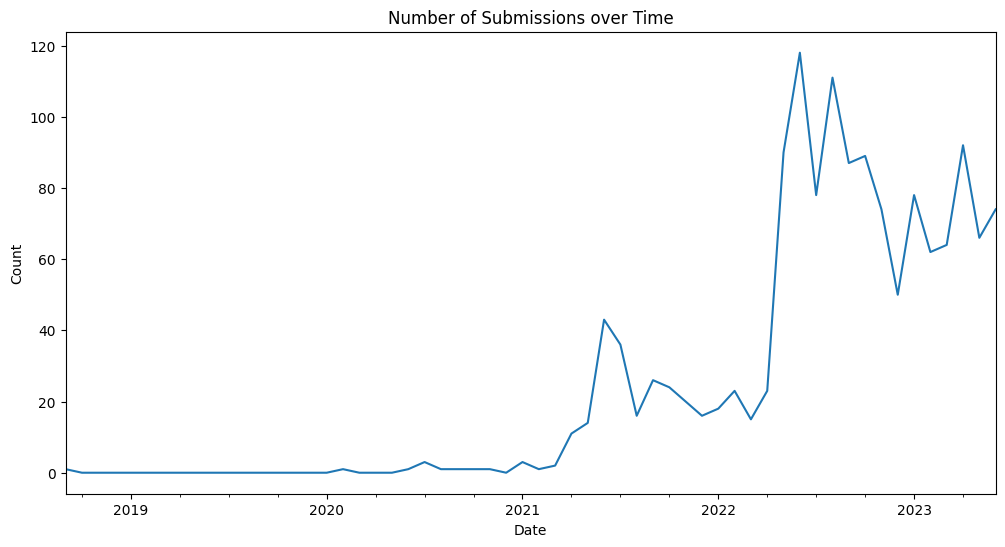

In [16]:
import matplotlib.pyplot as plt


# Set the "Date" column as the DataFrame's index
df.set_index('Date', inplace=True)

# Resample the data to a desired time frequency (e.g., monthly)
df_resampled = df.resample('M').size()

# Plot the resampled data
plt.figure(figsize=(12, 6))
df_resampled.plot(kind='line')
plt.title('Number of Submissions over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


It appears that the platform only gained traction in 2022 by the begin of the common "cycling season"

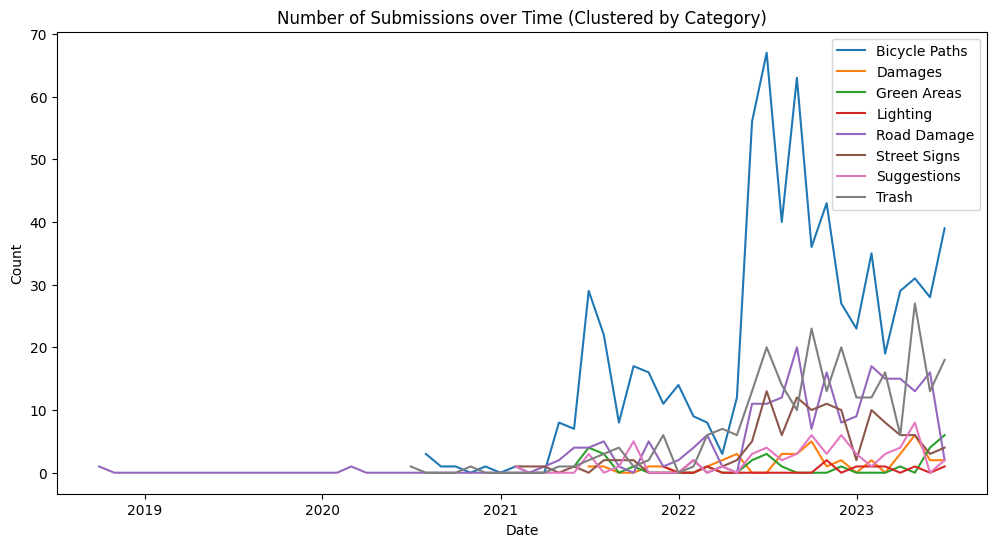

In [17]:


# Group the data by category and resample each category to a desired time frequency (e.g., monthly)
df_grouped = df.groupby('Category').resample('M').size()

# Plot the grouped data as a line chart
plt.figure(figsize=(12, 6))
for category, data in df_grouped.groupby('Category'):
    plt.plot(data.index.get_level_values(1), data.values, label=category)

plt.title('Number of Submissions over Time (Clustered by Category)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()



In [18]:
from geopy.geocoders import Nominatim
import os
import pandas as pd

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

data_directory = "scraped_data"

# Iterate over the rows in the DataFrame
for _, row in df.iterrows():
    submission_id = row['ID']
    location = row['Location']
    folder_path = os.path.join(data_directory, submission_id)
    txt_file_path = os.path.join(folder_path, f"{submission_id}_basicgeo.txt")
    # Skip if the file already exists
    if os.path.exists(txt_file_path):
        continue

    # Geocode the location
    location_info = geolocator.geocode(location, timeout=5)

    if location_info:
        coordinates = (location_info.latitude, location_info.longitude)
    else:
        coordinates = None

    # Save the coordinates to the text file
    with open(txt_file_path, "w") as txt_file:
        txt_file.write(f"Coordinates: {coordinates}\n")


In [19]:
import numpy as np
import re

# Filter out rows with missing or invalid coordinates
geo_df = df.dropna(subset=['Geo_Basic'])

# Function to extract valid coordinates
def extract_coordinates(coord_str):
    if isinstance(coord_str, str):
        try:
            match = re.search(r'([-+]?\d+\.\d+),\s*([-+]?\d+\.\d+)', coord_str)
            if match:
                lat = float(match.group(1))
                lon = float(match.group(2))
                return lat, lon
        except (ValueError, AttributeError):
            pass
    return np.nan, np.nan

# Apply the function to extract coordinates
geo_df[['Latitude', 'Longitude']] = geo_df['Geo_Basic'].apply(extract_coordinates).apply(pd.Series)

# Drop the original Geo_Basic column
geo_df = geo_df.drop(columns=['Geo_Basic'])

# Create a new DataFrame containing only valid coordinates
valid_geo_df = geo_df.dropna(subset=['Latitude', 'Longitude'])


/var/folders/wc/1fgpcwpx4rzfbbc7shb_wy8h0000gn/T/ipykernel_77915/1782579242.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df[['Latitude', 'Longitude']] = geo_df['Geo_Basic'].apply(extract_coordinates).apply(pd.Series)
/var/folders/wc/1fgpcwpx4rzfbbc7shb_wy8h0000gn/T/ipykernel_77915/1782579242.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_df[['Latitude', 'Longitude']] = geo_df['Geo_Basic'].apply(extract_coordinates).apply(pd.Series)


In [20]:
import piexif
from PIL import Image

def add_geo_to_exif(image_path, lat, lon):
    """
    Adds geolocation data to image EXIF metadata.

    Args:
        image_path (str): Path to the image file.
        lat (float): Latitude.
        lon (float): Longitude.
    """
    # Convert lat and lon to float in case they are not
    lat = float(lat)
    lon = float(lon)

    # Convert the latitude and longitude to GPS values
    lat_deg = int(abs(lat))
    lat_min = int((abs(lat) - lat_deg) * 60)
    lat_sec = (abs(lat) - lat_deg - lat_min / 60) * 3600

    lon_deg = int(abs(lon))
    lon_min = int((abs(lon) - lon_deg) * 60)
    lon_sec = (abs(lon) - lon_deg - lon_min / 60) * 3600

    # Open the image file
    img = Image.open(image_path)

    # Check if the image has exif data already
    if "exif" in img.info:
        exif_dict = piexif.load(img.info["exif"])
    else:
        # If not, create a new one
        exif_dict = {"0th":{}, "Exif":{}, "GPS":{}, "1st":{}, "thumbnail":None}

    # Set the GPS information
    exif_dict["GPS"][piexif.GPSIFD.GPSLatitudeRef] = b"N" if lat > 0 else b"S"
    exif_dict["GPS"][piexif.GPSIFD.GPSLatitude] = _to_deg(lat_deg, lat_min, lat_sec)
    exif_dict["GPS"][piexif.GPSIFD.GPSLongitudeRef] = b"E" if lon > 0 else b"W"
    exif_dict["GPS"][piexif.GPSIFD.GPSLongitude] = _to_deg(lon_deg, lon_min, lon_sec)

    # Write the GPS information into the EXIF metadata
    exif_bytes = piexif.dump(exif_dict)
    img.save(image_path, "jpeg", exif=exif_bytes)


def _to_deg(deg, min, sec):
    """
    Helper function to convert the GPS coordinates stored in the EXIF to degrees in float format.
    """
    # Ensure the values are integers
    deg = int(deg)
    min = int(min)
    sec = int(sec * 10000)

    # Return a tuple of three tuples
    return ((deg, 1), (min, 1), (sec, 10000))



# Scrape the data from the website
- Description
- Exact geo coordinates

In [23]:

# for each directory found in the folder "scraped_data" scrape the data from the website and save it in the folder. Each folder resembles one ID / submission which is the id behind /bms/. Example: https://www.xn--mngelmelder-l8a.de/bms/1250677
# we want to copy the data from the website and save it in the folder. The data we want to copy is the following:
# <dl class="dl bms-attr-column ">
#     <dt>Geokoordinaten</dt>
#     <dd>
    	
        
#     	   51,4300 - 7,1297
        
    	
#     </dd>
# </dl>
# The coordinates need to be reshaped into a tuple (51.4300, 7.1297) and saved in a text file in the folder. The text file should be named like the folder with the suffix "_geo.txt". Example: 1250677_geo.txt

import os
import re
import requests
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException

data_directory = "scraped_data"

# Iterate over the directories in the data directory
for directory in os.listdir(data_directory):
    # Create the full path to the directory
    directory_path = os.path.join(data_directory, directory)

    # Skip if it's not a directory
    if not os.path.isdir(directory_path):
        continue

    # Create the full path to the text file
    txt_file_path = os.path.join(directory_path, f"{directory}_full.txt")

    # Skip if the file already exists
    if os.path.exists(txt_file_path):
        continue

    # Get the URL
    url = f"https://www.xn--mngelmelder-l8a.de/bms/{directory}"

    # Open the URL
    driver.get(url)

    try:
        # Get the coordinates from the webpage
        coordinates_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//dt[text()="Geokoordinaten"]/following-sibling::dd'))
        )
        description_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//div[@class="messagetext-detail"]/p'))
        )
        # Extract the coordinates
        coordinates = coordinates_element.text.strip()
        # Extract the description
        description = description_element.text.strip()


        # Reshape the coordinates to match the desired format
        coordinates = tuple(map(float, coordinates.replace(',', '.').split(' - ')))
        print(coordinates)
        print(coordinates[0], coordinates[1])
        # add to image exif - but only if the image exists
        if os.path.exists(os.path.join(directory_path, f"{directory}.jpg")):
            add_geo_to_exif(os.path.join(directory_path, f"{directory}.jpg"), coordinates[0], coordinates[1])

        # Save the coordinates to the text file
        with open(txt_file_path, "w") as txt_file:
            txt_file.write(f"Coordinates: {coordinates}\n")
            txt_file.write(f"Description: {description}\n")

    except TimeoutException:
        print(f"Timed out waiting for page to load for URL: {url}")

driver.quit()


Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/1035068
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/1034185
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/846959
(51.408, 6.9387)
51.408 6.9387
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/751106
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/965266
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/1033701
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/1039009
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/1030920
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/1033132
Timed out waiting for page to load for URL: https://www.xn--mngelmelder-l8a.de/bms/1038181
(49.613, 8.6783)
49.613 8.6783
Timed out waiting for page to l

OSError: cannot write mode RGBA as JPEG

In [27]:
# Reads the data from the text files and create a new DataFrame with all scraped data in scraped_data folder

# creates a list of all directories in the folder "scraped_data"
# for each directory read the text file and extract the coordinates and the description
# create a new DataFrame with the columns "id", "coordinates" and "description"
# save the DataFrame as a csv file in the folder "scraped_data"

import os

import pandas as pd

data_directory = "scraped_data"

# Create an empty list to store the data
data = []

# Iterate over the directories in the data directory

for directory in os.listdir(data_directory):

    # Create the full path to the directory
    directory_path = os.path.join(data_directory, directory)

    # Skip if it's not a directory
    if not os.path.isdir(directory_path):
        continue

    # Create the full path to the text file
    txt_file_path = os.path.join(directory_path, f"{directory}_full.txt")

    # Skip if the file doesn't exist
    if not os.path.exists(txt_file_path):
        continue

    # Read the text file
    with open(txt_file_path, "r") as txt_file:
        # Read the lines
        lines = txt_file.readlines()

        # Extract the coordinates
        coordinates = lines[0].strip().split(": ")[1]
        coordinates = tuple(map(float, coordinates[1:-1].split(", ")))

        # Extract the description
        description = lines[1].strip().split(": ")[1]

        # Append the data to the list
        data.append((directory, coordinates, description))





In [28]:
from collections import Counter

# Extract the descriptions from the data
descriptions = [item[2] for item in data]

# Split the descriptions into individual words
words = [word.lower() for description in descriptions for word in description.split()]

# Count the occurrences of each word
word_counts = Counter(words)

# Define the words to filter out german stopwords / common words
filter_words = [
    "der", "die", "das", "und", "auf", "ist", "dem", "den", "es", "für", "in", "an", "sehr", "mit", "zu", "wo",
    "im", "ein", "eine", "von", "sich", "des", "dass", "als", "auch", "wie", "bei", "aus", "oder", "nach",
    "über", "alle", "wir", "wird", "zum", "noch", "mehr", "einem", "einen", "e", "am", "nicht", "hier",
    "durch", "vor", "man", "dieser", "sind", "so", "ich", "um", "wenn", "da", "nach", "nur", "kann", "schon",
    "unter", "haben", "aber", "ihr", "ihre", "dann", "ihm", "ihn", "seine", "ihnen", "einem", "ihr", "uns",
    "unsere", "doch", "mich", "dich", "deine", "de", "bitte", "seit", "liegt", "teilweise", "wieder", "vom",
    "hat", "zwischen", "richtung", "seit", "stelle", "muss", "müssen", "müsse", "müsste", "müssten",
    "<selenium.webdriver.remote.webelement.webelement", "sie", "wurde", "wurden", "wurde", "wurden", "wurde", "sollte", "werden", "werden."
]


# Remove the filtered words from the word counts
word_counts_filtered = {word: count for word, count in word_counts.items() if word not in filter_words}

# Sort the filtered word counts by the number of occurrences in descending order
sorted_word_counts = sorted(word_counts_filtered.items(), key=lambda x: x[1], reverse=True)

# Output the 20 most occurring words
for word, count in sorted_word_counts[:100]:
    print(f"{word}: {count}")


radweg: 71
straße: 32
baum: 26
fahrrad: 26
radfahrer: 26
weg: 26
gefährlich: 13
fußgänger: 13
(session="e8573437-d56f-45b4-8295-b5a158be7082",: 11
gerade: 11
fußweg: 10
besonders: 9
ohne: 9
steht: 9
fahren: 9
gefahr: 9
fahrradweg: 9
gehweg: 9
besteht: 8
stark: 8
kreuzung: 8
bereich: 8
bis: 8
dringend: 8
gefährliche: 8
leider: 8
gefährlich.: 8
fehlt: 8
gibt: 7
schlaglöcher: 7
äste: 7
immer: 7
stellen: 7
liegen: 7
diesen: 7
seite: 7
diesem: 7
radfahrer.: 7
ist.: 7
zur: 7
mehreren: 7
hängen: 7
radweges: 6
2: 6
rechts: 6
loch: 6
ob: 6
schild: 6
neben: 6
glasscherben: 6
beim: 6
dadurch: 6
/: 6
fahrtrichtung: 6
kein: 6
damit: 6
regen: 6
tief: 6
blockiert: 5
diese: 5
können.: 5
autos: 5
fahrräder: 5
bild: 5
oft: 5
fast: 5
neu: 5
fehlen: 5
möglich: 5
kommt: 5
radfahrer,: 5
einer: 5
mehrere: 5
war: 5
ist,: 5
rad-: 5
laub: 5
dort: 5
keine: 5
fuß-: 5
weg.: 5
kommen: 5
ca.: 5
sieht: 5
fahrradfahrer: 5
kinder: 5
wäre: 5
breite: 4
bäume: 4
schlagloch: 4
bereits: 4
beiden: 4
seiten: 4
tiefes: 4
radve

The analysis of word occurrences in the provided dataset reveals key insights about the reported issues related to cycling infrastructure. The most frequently mentioned words include "radweg" (bikelane), "straße" (street), "baum" (tree), "fahrrad" (bicycle), "radfahrer" (cyclist), and "weg" (path). These words highlight the primary concerns reported by users, indicating a focus on bikelanes, dangerous situations, crossings, potholes, trees, branches, and glass shards.

It is clear from the word frequency that cyclists often encounter hazardous conditions, such as blockages on bikelanes and the absence of proper signage. Issues like potholes, branches obstructing the path, and glass shards pose risks to cyclists' safety. The data also suggests a need for better infrastructure in terms of crossings, bicycle paths, and footpaths to ensure the smooth and secure movement of cyclists and pedestrians.

The high occurrence of certain terms, including "gefährlich" (dangerous), "fehlt" (missing), "gefährliche" (hazardous), and "blockiert" (blocked), emphasizes the urgent attention required to address these concerns.

